Output()

Output()

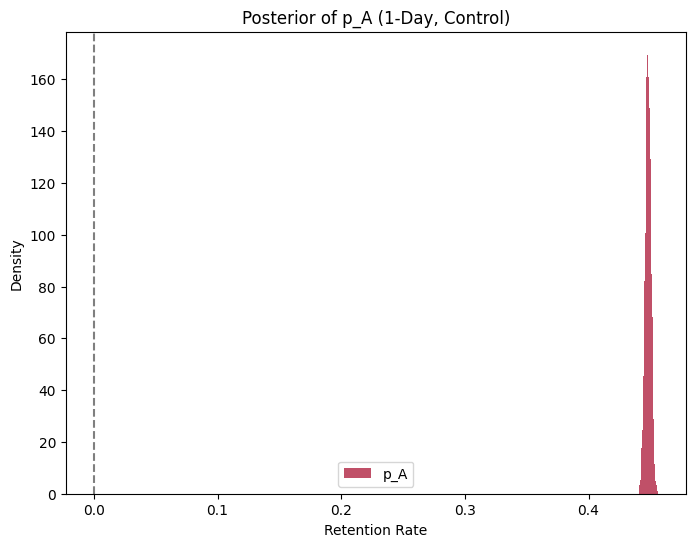

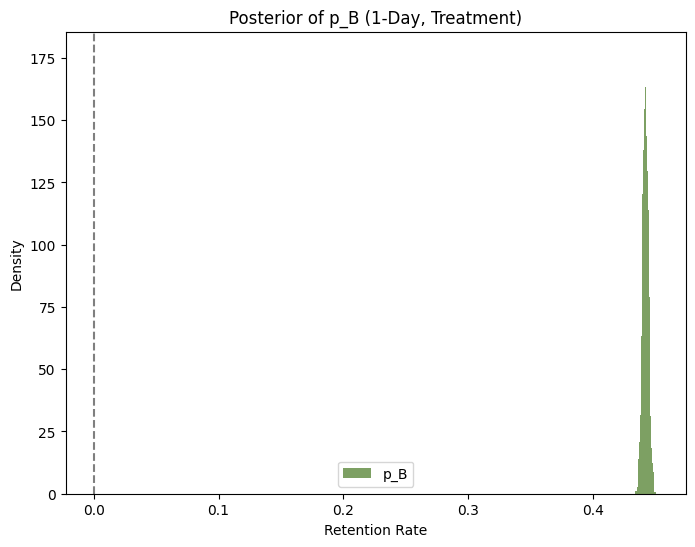

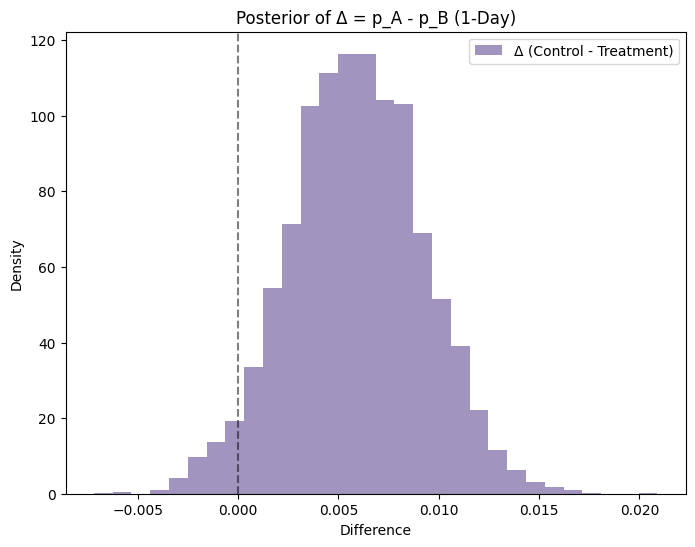

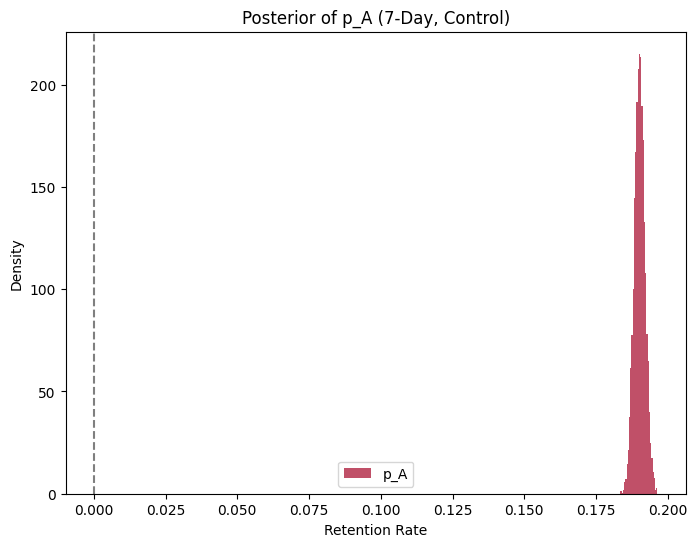

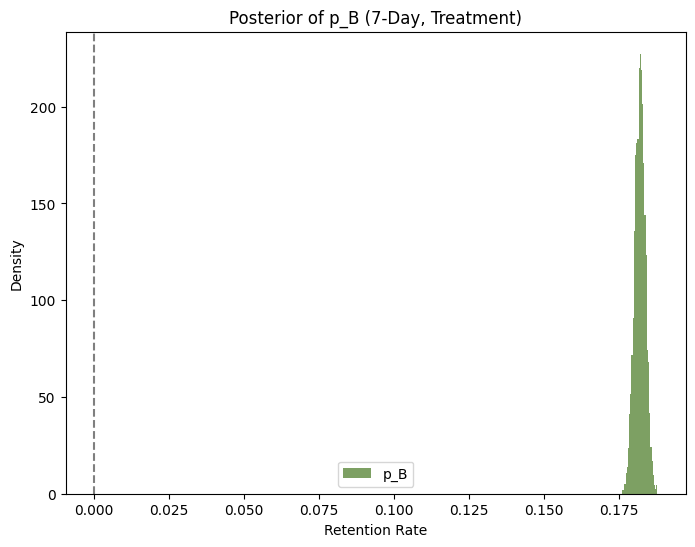

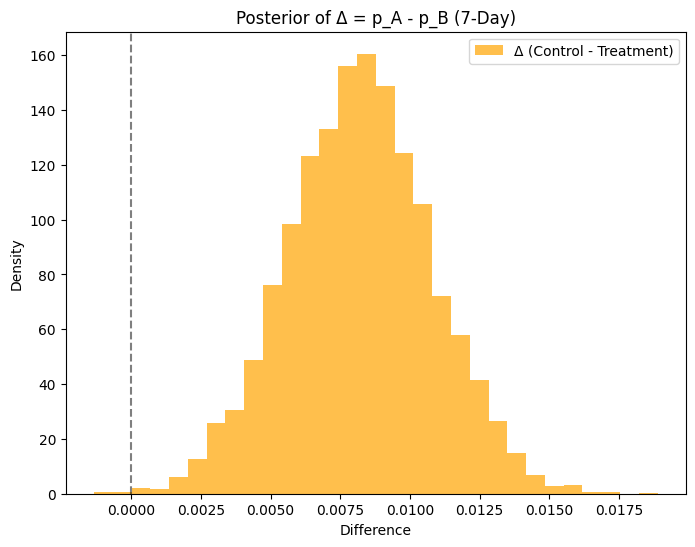

 Probability that control (p_A) > treatment (p_B) for 1-day retention: 96.325%
 Probability that control (p_A) > treatment (p_B) for 7-day retention: 99.900%


In [7]:
import pandas as pd
import pymc as pm
import matplotlib.pyplot as plt
import numpy as np
import arviz as az

# Set random seed for reproducibility
np.random.seed(123)

# Load the dataset
data = pd.read_csv("https://github.com/dustywhite7/Econ8310/raw/master/AssignmentData/cookie_cats.csv")

# -------------------- 1-DAY RETENTION MODEL --------------------
with pm.Model() as model_1day:
    # Priors
    p_A = pm.Beta("p_A", alpha=1, beta=1)
    p_B = pm.Beta("p_B", alpha=1, beta=1)
    delta = pm.Deterministic("delta", p_A - p_B)

    # Observed data
    obs_A = pm.Bernoulli("obs_A", p=p_A, observed=data.loc[data['version'] == 'gate_30', 'retention_1'])
    obs_B = pm.Bernoulli("obs_B", p=p_B, observed=data.loc[data['version'] == 'gate_40', 'retention_1'])

    # Sampling
    trace_1day = pm.sample(2000, tune=1000, cores=2, random_seed=123)

# Extract samples
p_A_samples_1d = trace_1day.posterior["p_A"].values.flatten()
p_B_samples_1d = trace_1day.posterior["p_B"].values.flatten()
delta_samples_1d = trace_1day.posterior["delta"].values.flatten()

# Probability Control > Treatment
prob_A_better_1d = np.mean(delta_samples_1d > 0)

# -------------------- 7-DAY RETENTION MODEL --------------------
with pm.Model() as model_7day:
    p_A = pm.Beta("p_A", alpha=1, beta=1)
    p_B = pm.Beta("p_B", alpha=1, beta=1)
    delta = pm.Deterministic("delta", p_A - p_B)

    obs_A = pm.Bernoulli("obs_A", p=p_A, observed=data.loc[data['version'] == 'gate_30', 'retention_7'])
    obs_B = pm.Bernoulli("obs_B", p=p_B, observed=data.loc[data['version'] == 'gate_40', 'retention_7'])

    trace_7day = pm.sample(2000, tune=1000, cores=2, random_seed=123)

p_A_samples_7d = trace_7day.posterior["p_A"].values.flatten()
p_B_samples_7d = trace_7day.posterior["p_B"].values.flatten()
delta_samples_7d = trace_7day.posterior["delta"].values.flatten()

prob_A_better_7d = np.mean(delta_samples_7d > 0)

# -------------------- PLOTS --------------------
# Plotting helper
def plot_posterior(samples, title, xlabel, label, color):
    plt.figure(figsize=(8, 6))
    plt.hist(samples, bins=30, color=color, alpha=0.7, density=True, label=label)
    plt.axvline(0, color="black", linestyle="--", alpha=0.5)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

# 1-Day Retention Posteriors
plot_posterior(p_A_samples_1d, "Posterior of p_A (1-Day, Control)", "Retention Rate", "p_A", "#A60628")
plot_posterior(p_B_samples_1d, "Posterior of p_B (1-Day, Treatment)", "Retention Rate", "p_B", "#467821")
plot_posterior(delta_samples_1d, "Posterior of Δ = p_A - p_B (1-Day)", "Difference", "Δ (Control - Treatment)", "#7A68A6")

# 7-Day Retention Posteriors
plot_posterior(p_A_samples_7d, "Posterior of p_A (7-Day, Control)", "Retention Rate", "p_A", "#A60628")
plot_posterior(p_B_samples_7d, "Posterior of p_B (7-Day, Treatment)", "Retention Rate", "p_B", "#467821")
plot_posterior(delta_samples_7d, "Posterior of Δ = p_A - p_B (7-Day)", "Difference", "Δ (Control - Treatment)", "#FFA500")

# -------------------- INTERPRETATION --------------------
print(f" Probability that control (p_A) > treatment (p_B) for 1-day retention: {prob_A_better_1d:.3%}")
print(f" Probability that control (p_A) > treatment (p_B) for 7-day retention: {prob_A_better_7d:.3%}")

